<a href="https://colab.research.google.com/github/Devlaxman93/Neurohackers/blob/experimental-code/load_steinmetz_data_and_plot_PSTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Steinmetz data

includes some visualizations

In [34]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [36]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [73]:
#@title import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [8, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

we are interested in sessions: 12 13 27 39 with the following regions ['CA1', 'VISam', 'PL' , 'MOs']

In [39]:
# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
session_interested = [12,13,27,39]
region_interested = ["CA1","VISam","PL","MOs"]
dat_12 = alldat[session_interested[0]-1]
dat_13 = alldat[session_interested[1]-1]
dat_27 = alldat[session_interested[2]-1]
dat_39 = alldat[session_interested[3]-1]
print(dat_12.keys())

dict_keys(['spks', 'wheel', 'pupil', 'lfp', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'brain_area_lfp', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'waveform_w', 'waveform_u', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'lfp_passive', 'pupil_passive', 'wheel_passive'])


"alldat" contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. The mouse had to determine which side has the highest contrast. For each dat = alldat[k], you have the following fields:

* dat['spks']: neurons by trials by time bins. Time bin = 10ms.   
* dat['brain_area']: brain area for each neuron recorded. 
* dat['contrast_right']: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* dat['contrast_left']: contrast level for left stimulus. 
* dat['response']: which side the response was (-1, 0, 1). Choices for the right stimulus are -1.  
* dat['response_times']: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and always does!). 
* dat['wheel']: exact position of the wheel that the mice uses to make a response, binned at 10ms. 
* dat['pupil']: pupil area  (noisy, because pupil is very small). 
* dat['lfp']: recording of the local field potential in each brain area from this experiment, binned at 10ms.
* dat['brain_area_lfp']: brain area names for the LFP channels. 




In [38]:
print(alldat.shape) # total number of sessions

(39,)


In [83]:
dat = dat_13

print(np.shape(dat['brain_area']))
b_region = dat['brain_area']
print(np.shape(b_region))

stim_onset= dat['stim_onset']
print(stim_onset) # in ms
go_cue = dat['gocue'] # go_cue in ms
print(go_cue.shape) 
#print(go_cue)

color_palette = ['lightcoral','brown','chocolate','darkkhaki','olivedrab','palegreen','seagreen','turquoise','darkcyan','steelblue']

(983,)
(983,)
0.5
(300, 1)


Generating a PSTH trial aligned to GO cue and Stimulus cue
https://www.tdt.com/support/python-sdk/offline-analysis-examples/raster-peristimulus-time-histogram-psth-example/



(34, 300, 250)
(34, 250)


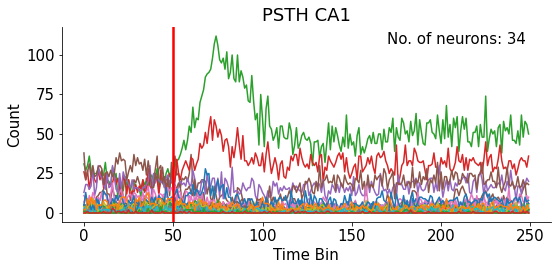

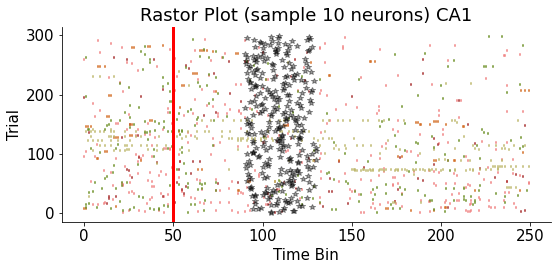

(34, 300, 250)
(34, 250)


<Figure size 576x288 with 0 Axes>

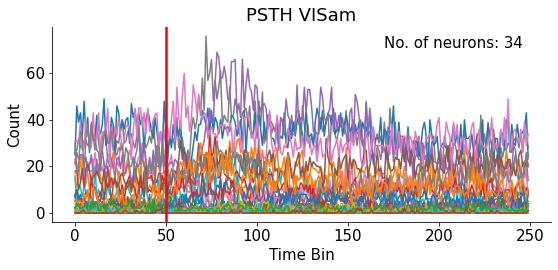

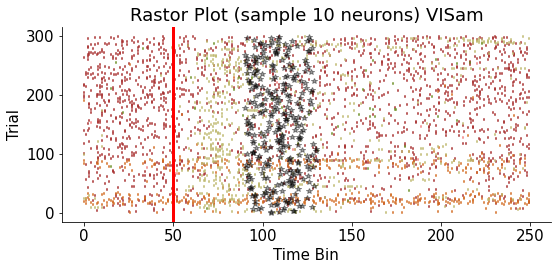

(184, 300, 250)
(184, 250)


<Figure size 576x288 with 0 Axes>

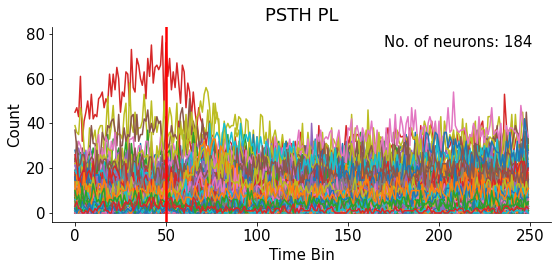

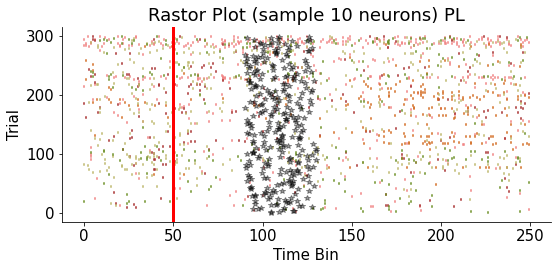

(46, 300, 250)
(46, 250)


<Figure size 576x288 with 0 Axes>

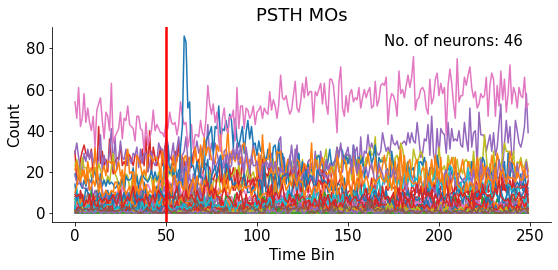

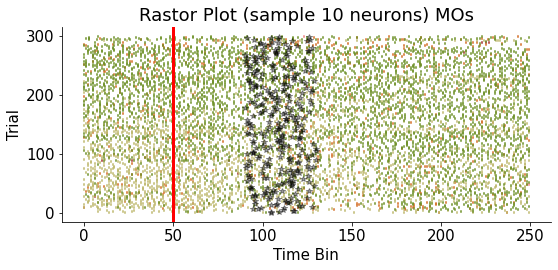

<Figure size 576x288 with 0 Axes>

In [82]:
# PSTH - mean firing rate across trials 
bin_size = 10 # 1 bin = 10 ms
stim_onset_bin = stim_onset*1000/bin_size
go_cue_bin = stim_onset_bin+(go_cue*1000/bin_size)

for this_region in region_interested:
  neurons = dat['spks'][b_region==this_region]

  print(neurons.shape)
  n_neurons = np.shape(neurons)[0]
  n_trial = np.shape(neurons)[1]
  n_bins = np.shape(neurons)[2]

  psth= np.sum(neurons,axis=1)
  print(psth.shape)

  fig = plt.figure(211)
  plt.plot(psth.T)
  plt.axvline(x=stim_onset_bin,linewidth=2.5, color='r')
  plt.xlabel('Time Bin')
  #plt.xlim(0,250)
  plt.ylabel('Count')
  plt.text(170,np.max(psth)-5,'No. of neurons: '+str(n_neurons))
  plt.title('PSTH '+this_region)
  f_psth = this_region+'_psth'+'.png'
  plt.savefig(f_psth)

  fig2 = plt.figure(212)
  for n in range(5): #n_neurons in range
    for i in range(n_trial):
      for j in range(n_bins):
          if neurons[n,i,j] == 1:
              x1 = [i,i+1]
              x2 = [j,j]
              plt.plot(x2,x1,color = color_palette[n])
              plt.axvline(x=stim_onset_bin,linewidth=2.5, color='r')
  plt.plot(go_cue_bin,np.arange(0,len(go_cue_bin)),'k*',alpha = 0.4)
 
  plt.xlabel('Time Bin')
  plt.ylabel('Trial')
  plt.title('Rastor Plot (sample 10 neurons) '+ this_region)
  
  plt.show()
  f_rastor = this_region+'_rastor'+'.png'
  plt.savefig(f_rastor)

In [ ]:
#@title groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
               ]

# not in this animals (but in others on figshare)
#  ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
#  ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
#  ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate

NN = len(dat['brain_area']) # number of neurons
barea = len(brain_groups) * np.ones(NN, ) # last one is "other"
for j in range(len(brain_groups)):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region

https://numpy.org/doc/stable/reference/generated/numpy.isin.html


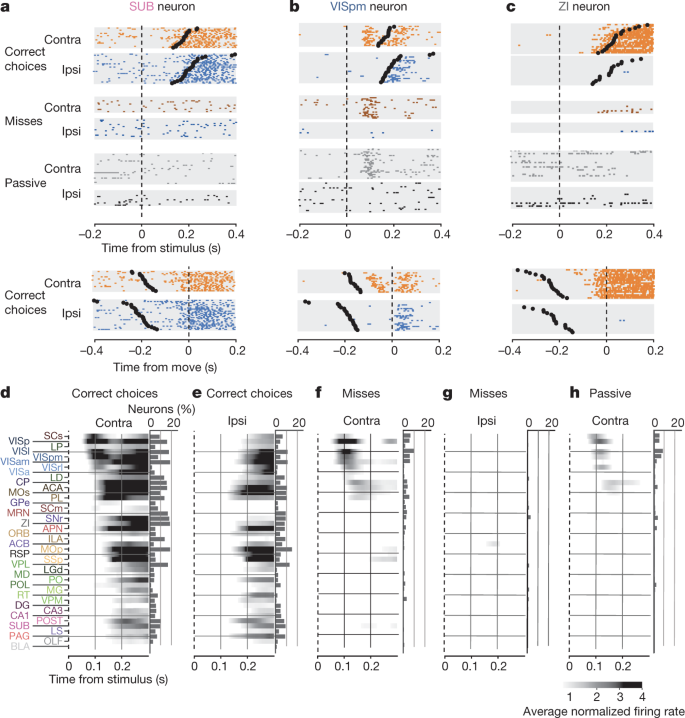